<a href="https://colab.research.google.com/github/OmarJFR/CNN/blob/main/VGG16_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###VGGNet was born out of the need to reduce the # of parameters in the CONV layers and improve on training time.

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras import datasets,models,layers
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
from IPython.display import Image, display

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [ ]:
# Normalization
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
print((X_train.shape,y_train.shape))
print((X_test.shape,y_test.shape))

((50000, 32, 32, 3), (50000, 1))
((10000, 32, 32, 3), (10000, 1))



###The idea behind having fixed size kernels is that all the variable size convolutional kernels (11x11, 5x5, 3x3) can be replicated by making use of multiple 3x3 kernels as building blocks.

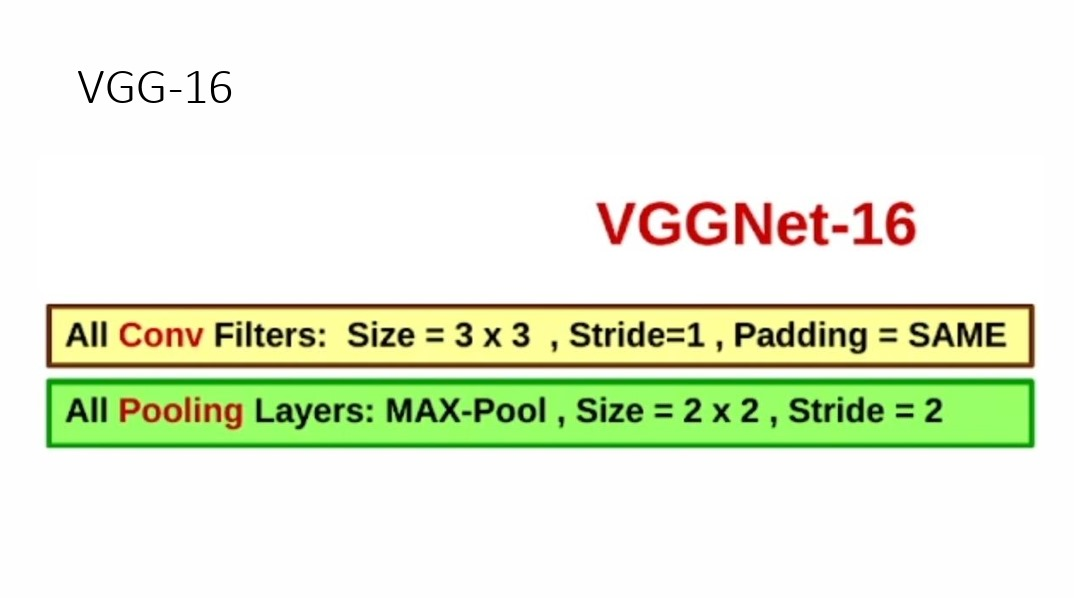

In [ ]:
display(Image(filename='VGG-16.jpg'))

In [ ]:
CNN=models.Sequential([

    # Block 1
    layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1, 1),padding='same',input_shape=(32,32,3),activation='relu'),
    layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2), strides=(2, 2)),

    # Block 2
    layers.Conv2D(filters=128,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.Conv2D(filters=128,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2), strides=(2, 2)),

    # Block 3
    layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2), strides=(2, 2)),

    # Block 4
    layers.Conv2D(filters=512,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.Conv2D(filters=512,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.Conv2D(filters=512,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2), strides=(2, 2)),

    # Block 5
    layers.Conv2D(filters=512,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.Conv2D(filters=512,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.Conv2D(filters=512,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2), strides=(2, 2)),

    # Flatten and FC layers
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                   

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=1e-4)
CNN.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
            )

In [ ]:
CNN.fit(X_train,y_train,epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 62s 36ms/step - loss: 2.0521 - accuracy: 0.1749 - val_loss: 1.8144 - val_accuracy: 0.2716
Epoch 2/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.5643 - accuracy: 0.3941 - val_loss: 1.3384 - val_accuracy: 0.4933
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1791 - accuracy: 0.5665 - val_loss: 1.0497 - val_accuracy: 0.6232
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9413 - accuracy: 0.6638 - val_loss: 0.9023 - val_accuracy: 0.6848
Epoch 5/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.7837 - accuracy: 0.7265 - val_loss: 0.8269 - val_accuracy: 0.7163
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6644 - accuracy: 0.7710 - val_loss: 0.7645 - val_accuracy: 0.7432
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.5537 - accuracy: 0.8113 - val_loss: 0.7561 -

313/313 [==============================] - 3s 8ms/step


Text(95.72222222222221, 0.5, 'Truth')

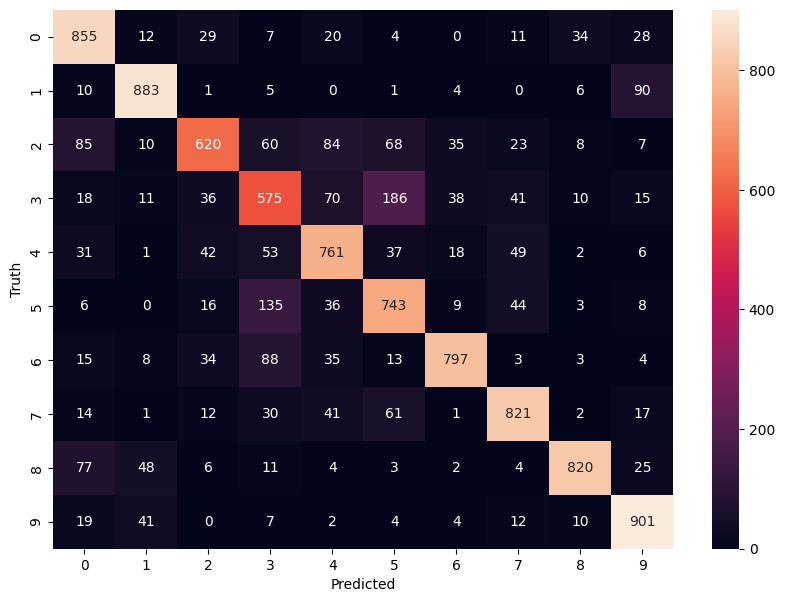

In [ ]:
y_pred = CNN.predict(X_test)
y_pred_labels=[np.argmax(element) for element in y_pred]#returns the index of the highest probability.
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.85      0.80      1000
           1       0.87      0.88      0.88      1000
           2       0.78      0.62      0.69      1000
           3       0.59      0.57      0.58      1000
           4       0.72      0.76      0.74      1000
           5       0.66      0.74      0.70      1000
           6       0.88      0.80      0.84      1000
           7       0.81      0.82      0.82      1000
           8       0.91      0.82      0.86      1000
           9       0.82      0.90      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



Acc -> 89% train 77% test